<a href="https://colab.research.google.com/github/Ashwin9515/CS506-Team-Project-Team09/blob/main/CS506_TP01_Team09_Ashwin_Akarsh_Divakar_Sara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1:** Importing Libraries & Dataset

**Objective:** Load required Python libraries and the IPL dataset for analysis.

**Pandas Concepts:**
1. read_csv() for importing datasets.
2. pd.set_option() and plotting setups using Matplotlib and Seaborn.

In [1]:
!pip install pandas matplotlib seaborn


In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
# Load dataset
df = pd.read_csv("../datasets/all_season_summary.csv")



# Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (1032, 45)

Columns:
 ['season', 'id', 'name', 'short_name', 'description', 'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result', 'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']


**Section 2: Dataset Overview & Cleaning** - This section explores the structure and completeness of the IPL dataset. We visualize missing values to understand which columns are incomplete and proceed to clean the data by:
1. Dropping rows where the winner is missing (as they are critical to most analyses)
2. Converting date and score columns to appropriate formats
3. Engineering a new column to calculate the margin of victory.

Pandas Concepts: shape, columns, isnull(), dropna(), .copy(), to_datetime(), to_numeric() - DataFrame filtering, transformation, visualization with Seaborn

These steps ensure the dataset is ready for meaningful analysis in subsequent sections.


Missing Values:
 points              67
reserve_umpire      29
highlights          26
home_key_bowler     24
away_key_bowler     22
pom                 15
away_runs           13
away_wickets        13
2nd_inning_score    13
away_overs          13
away_key_batsman    13
away_boundaries     13
home_key_batsman    11
home_boundaries     11
home_overs          11
1st_inning_score    11
away_score          11
home_wickets        11
home_runs           11
home_score           8
tv_umpire            5
season               3
toss_won             3
decision             3
away_captain         3
home_captain         3
umpire1              3
super_over           3
away_playx1          3
home_playx1          3
umpire2              3
match_days           3
referee              3
winner               1
dtype: int64


/tmp/ipykernel_2362/1987025496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, y="Column", x="Missing Values", palette="flare")


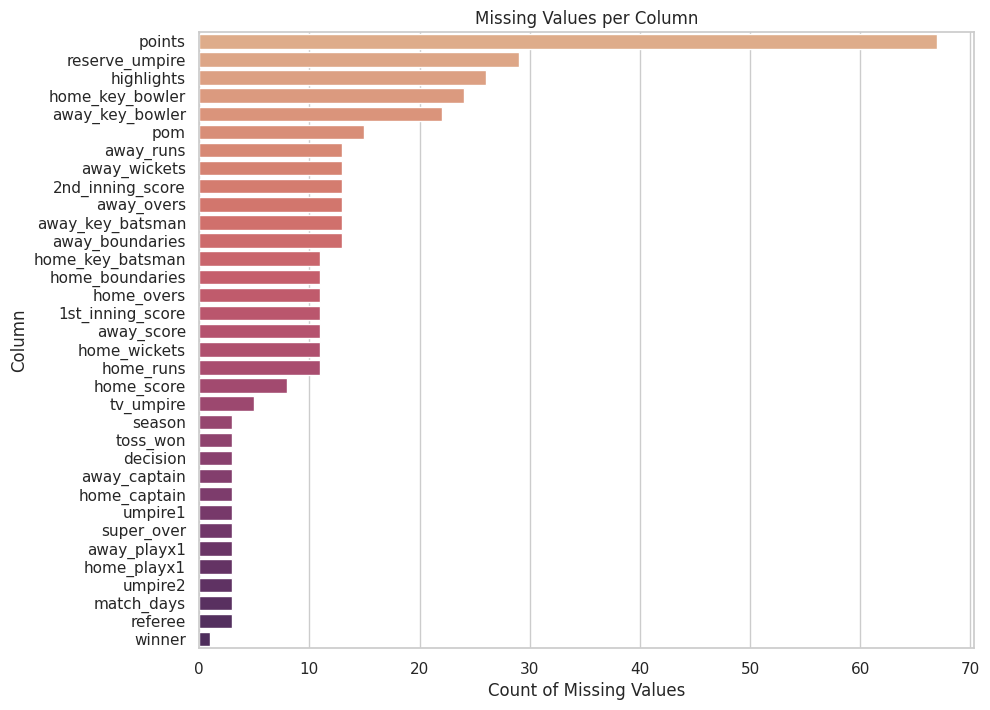


 Data cleaned. Shape after dropping null 'winner': (1031, 46)


In [5]:
# Missing values count
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0].sort_values(ascending=False))

# Visualize missing values
missing_df = pd.DataFrame({
    "Column": missing_values[missing_values > 0].index,
    "Missing Values": missing_values[missing_values > 0].values
}).sort_values(by="Missing Values", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=missing_df, y="Column", x="Missing Values", palette="flare")
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column")
plt.show()

# Clean dataset: Drop rows where winner is missing and make a safe copy
df = df.dropna(subset=["winner"]).copy()

# Convert date columns to datetime
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])

# Convert score columns to numeric (just in case there are issues)
df["home_score"] = pd.to_numeric(df["home_score"], errors="coerce")
df["away_score"] = pd.to_numeric(df["away_score"], errors="coerce")

# Add result margin column (difference between home and away scores)
df["result_margin"] = df[["home_score", "away_score"]].max(axis=1) - df[["home_score", "away_score"]].min(axis=1)

# Post-cleaning confirmation
print("\n Data cleaned. Shape after dropping null 'winner':", df.shape)


**Section 3:** Most Successful Teams

**Objective:** Identify which teams have won the most IPL matches.

**Pandas Concepts:**
1. value_counts() to count wins.
2. reset_index() to convert to DataFrame.
3. Bar plots using Seaborn.

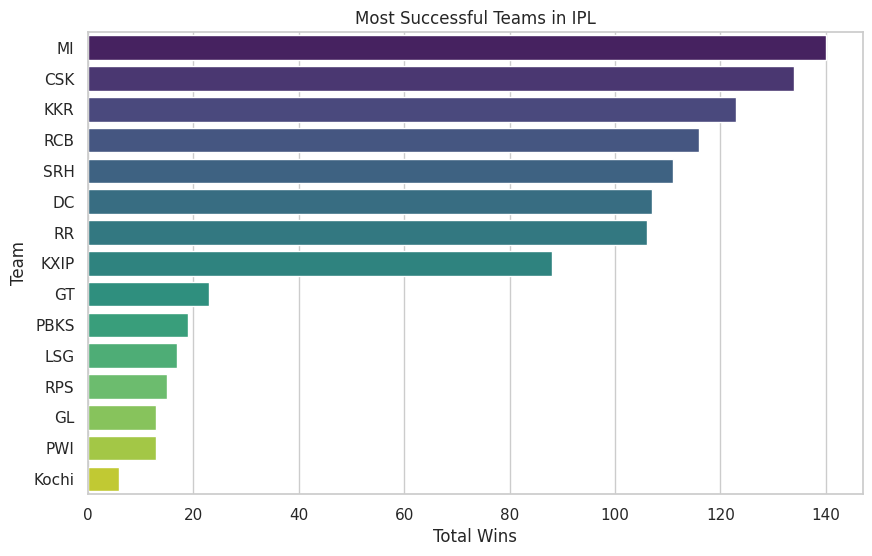

In [6]:
team_wins = df["winner"].value_counts().reset_index()
team_wins.columns = ["Team", "Total Wins"]
sns.barplot(data=team_wins, y="Team", x="Total Wins", hue="Team", palette="viridis", dodge=False, legend=False)
plt.title("Most Successful Teams in IPL")
plt.show()

Section 4: Toss Decision Impact
Objective:
Explore how toss decisions (bat or field) affect match outcomes.

Pandas Concepts:
Boolean comparison and new column creation.

groupby() and mean() for win-rate calculation.

Bar plots for categorical comparison.

/tmp/ipykernel_2362/1955135056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toss_win_rate, x="Toss Decision", y="Win Rate", palette="Set2")


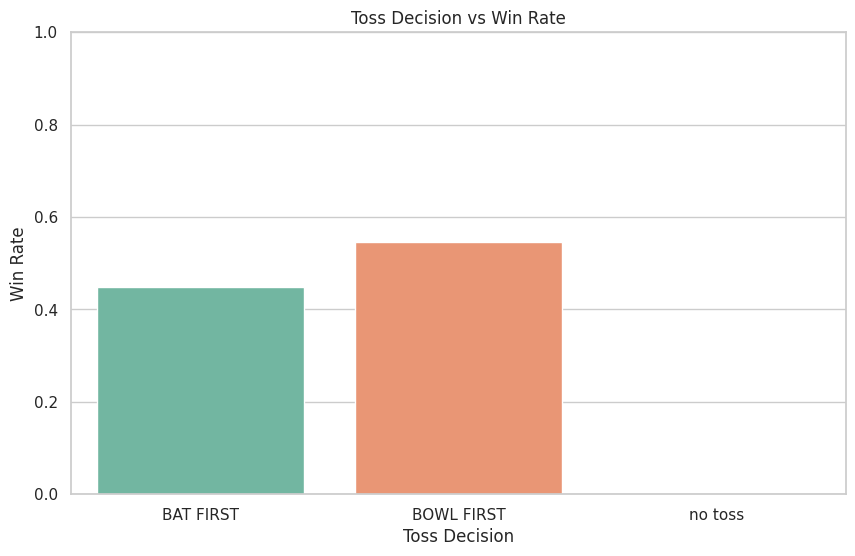

In [7]:
df["toss_match_win"] = df["toss_won"] == df["winner"]
toss_win_rate = df.groupby("decision")["toss_match_win"].mean().reset_index()
toss_win_rate.columns = ["Toss Decision", "Win Rate"]

sns.barplot(data=toss_win_rate, x="Toss Decision", y="Win Rate", palette="Set2")
plt.title("Toss Decision vs Win Rate")
plt.ylim(0, 1)
plt.show()

Section 5: Matches Per Season
Objective:
Analyze how many matches were played in each IPL season.

Pandas Concepts:
value_counts() and sort_values() for frequency analysis.

Line plots using Seaborn.

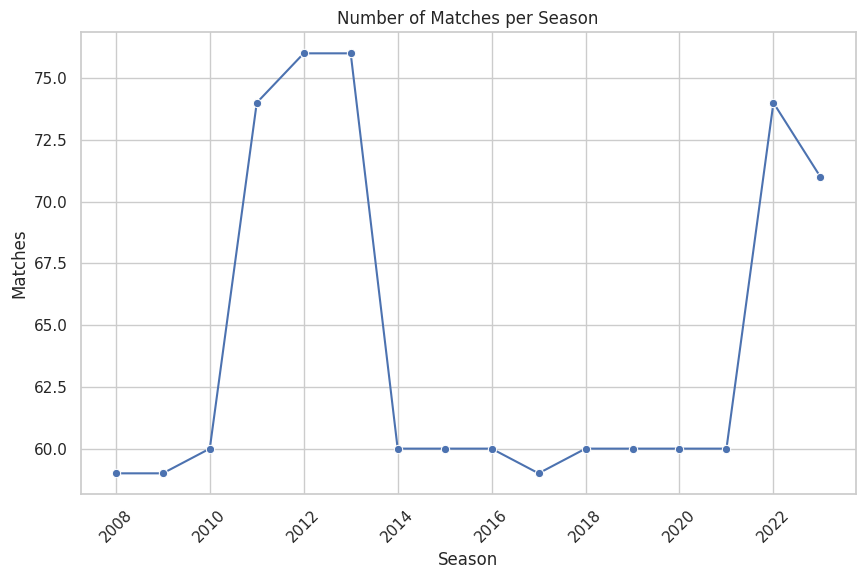

In [8]:
season_matches = df["season"].value_counts().reset_index()
season_matches.columns = ["Season", "Matches"]
season_matches = season_matches.sort_values(by="Season")

sns.lineplot(data=season_matches, x="Season", y="Matches", marker="o")
plt.title("Number of Matches per Season")
plt.xticks(rotation=45)
plt.show()

 Section 6: Popular Venues
Objective:
Determine which stadiums hosted the most matches.

Pandas Concepts:
value_counts() for venue frequency.

Bar plot for visualization.

/tmp/ipykernel_2362/118508623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_counts, y="Venue", x="Matches", palette="magma")


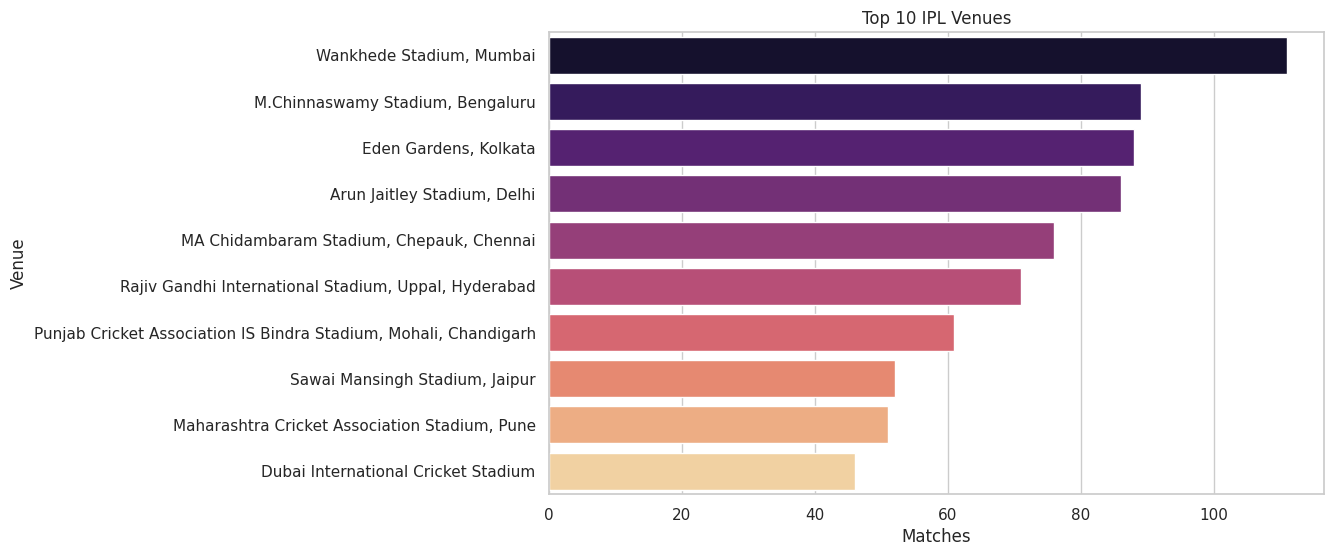

In [9]:
venue_counts = df["venue_name"].value_counts().reset_index().head(10)
venue_counts.columns = ["Venue", "Matches"]

sns.barplot(data=venue_counts, y="Venue", x="Matches", palette="magma")
plt.title("Top 10 IPL Venues")
plt.show()

Section 7: Top Players (Player of the Match)
Objective:
Identify the players who won the most "Player of the Match" awards.

Pandas Concepts:
value_counts() for award frequency.

Plotting top performers.

/tmp/ipykernel_2362/1792095912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_players, x="Awards", y="Player", palette="cubehelix")


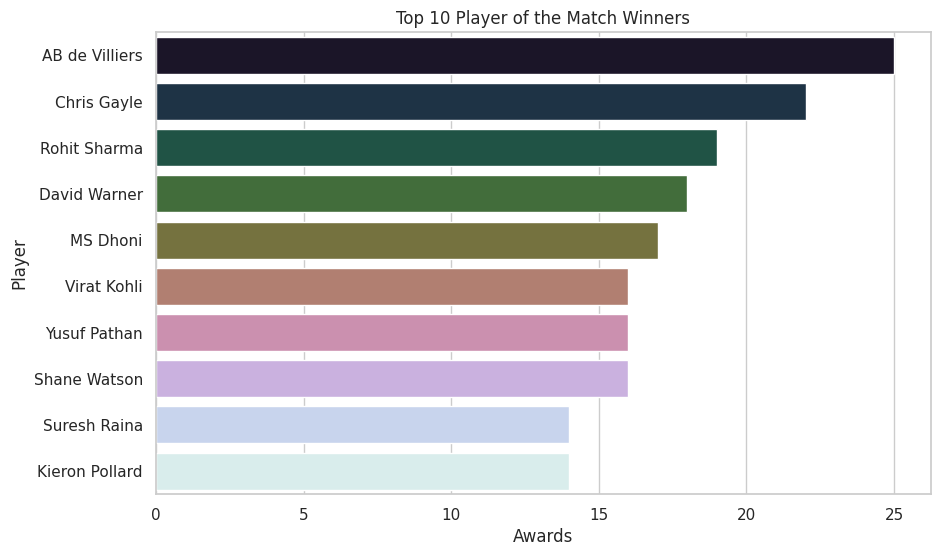

In [10]:
top_players = df["pom"].value_counts().reset_index().head(10)
top_players.columns = ["Player", "Awards"]

sns.barplot(data=top_players, x="Awards", y="Player", palette="cubehelix")
plt.title("Top 10 Player of the Match Winners")
plt.show()

 Section 8: Home vs Away Score Comparison
Objective:
Visualize and compare scores between home and away teams.

Pandas Concepts:
scatterplot() to compare two numeric columns.

Using hue to show match winner.

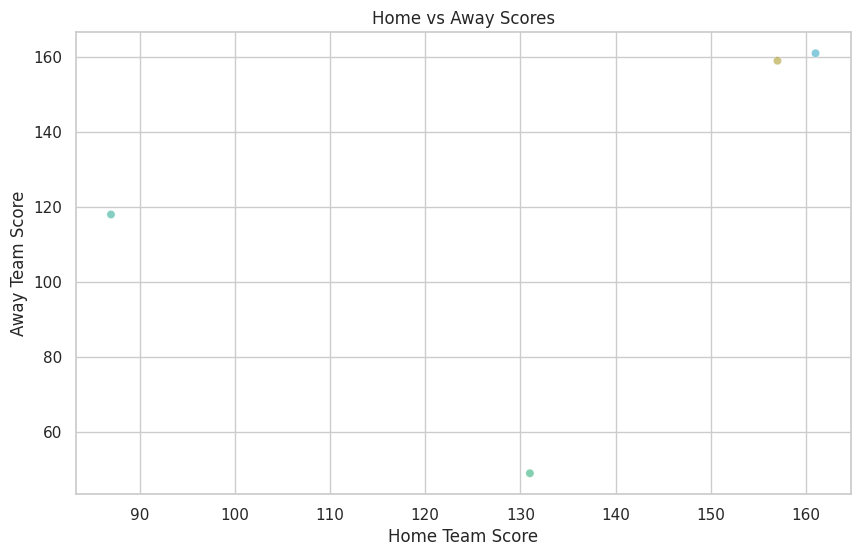

In [11]:
sns.scatterplot(data=df, x="home_score", y="away_score", hue="winner", alpha=0.6)
plt.title("Home vs Away Scores")
plt.xlabel("Home Team Score")
plt.ylabel("Away Team Score")
plt.legend([], [], frameon=False)
plt.show()

Section 9: Key Player Frequency
Objective:
Count how often key batsmen were listed across matches.

Pandas Concepts:
value_counts(), add() for merging two series.

sort_values() and bar plot.

/tmp/ipykernel_2362/2813647117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=key_batsmen, x="Appearances", y="Player", palette="YlGnBu")


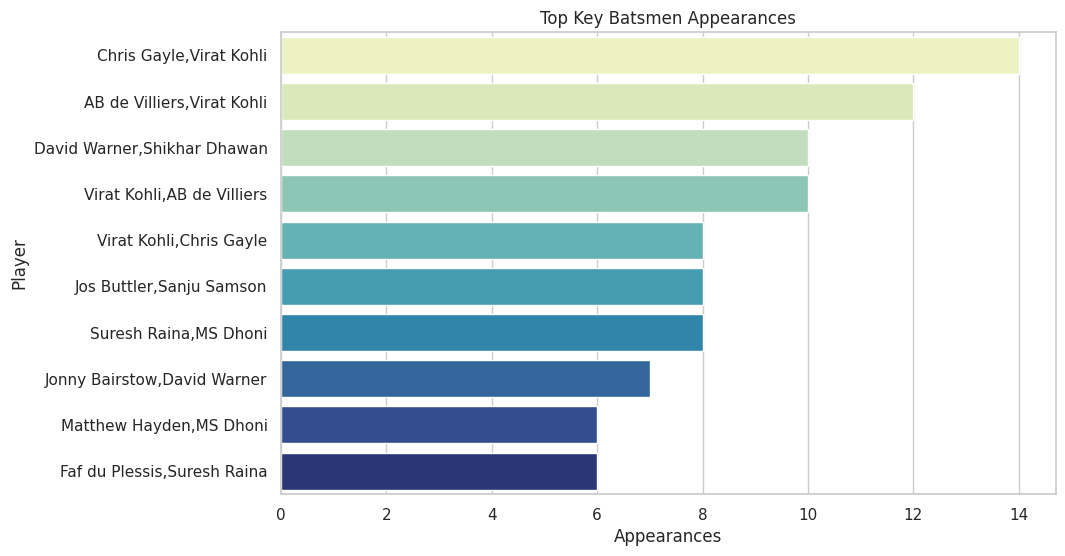

In [12]:
key_batsmen = df["home_key_batsman"].value_counts().add(df["away_key_batsman"].value_counts(), fill_value=0).sort_values(ascending=False).head(10)
key_batsmen = key_batsmen.reset_index()
key_batsmen.columns = ["Player", "Appearances"]

sns.barplot(data=key_batsmen, x="Appearances", y="Player", palette="YlGnBu")
plt.title("Top Key Batsmen Appearances")
plt.show()

Section 10: Final Summary Stats
Objective:
Print summary metrics about seasons, matches, venues, teams, and players.

Pandas Concepts:
nunique() and len() for dataset-wide stats.

In [13]:
print("\n Summary:")
print(f"Total Seasons: {df['season'].nunique()}")
print(f"Total Matches: {len(df)}")
print(f"Total Teams: {pd.unique(df['home_team']).size}")
print(f"Total Venues: {df['venue_name'].nunique()}")
print(f"Total Players of Match: {df['pom'].nunique()}")


 Summary:
Total Seasons: 16
Total Matches: 1031
Total Teams: 15
Total Venues: 37
Total Players of Match: 279


Advanced Match Outcomes: Victory Margin Analysis
Overview: Shows how teams tend to win — by dominating with runs or chasing with wickets.

🧠 Pandas Concepts:

.value_counts() – to count result types like "runs" or "wickets"

.reset_index() – to prepare data for plotting

.groupby() + .agg() (optional) – if extending to margin stats

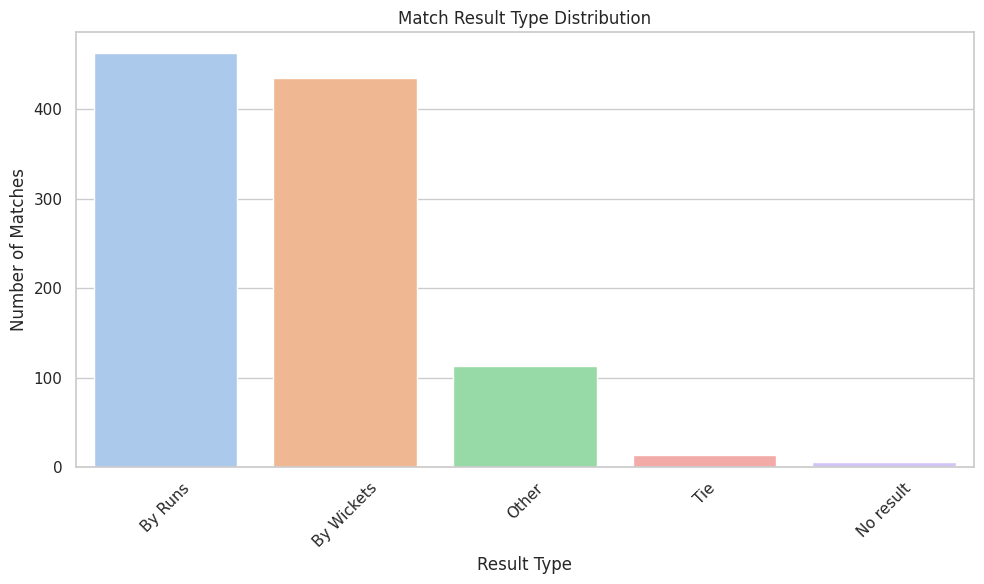

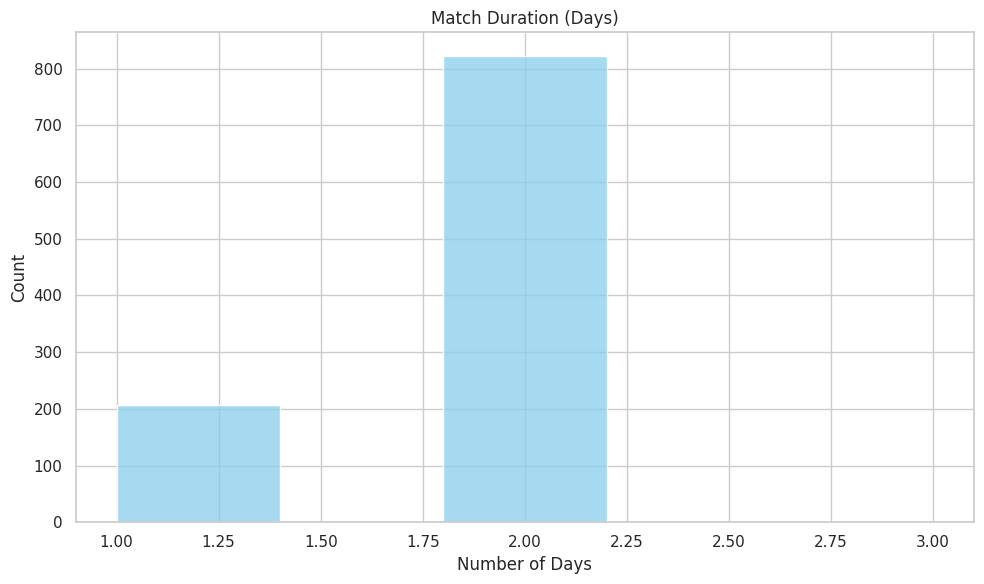

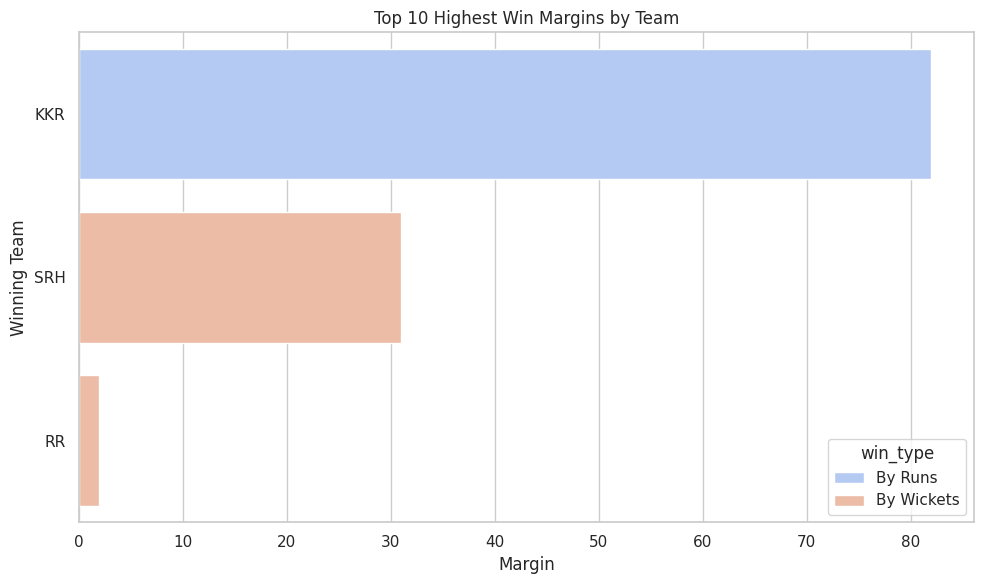

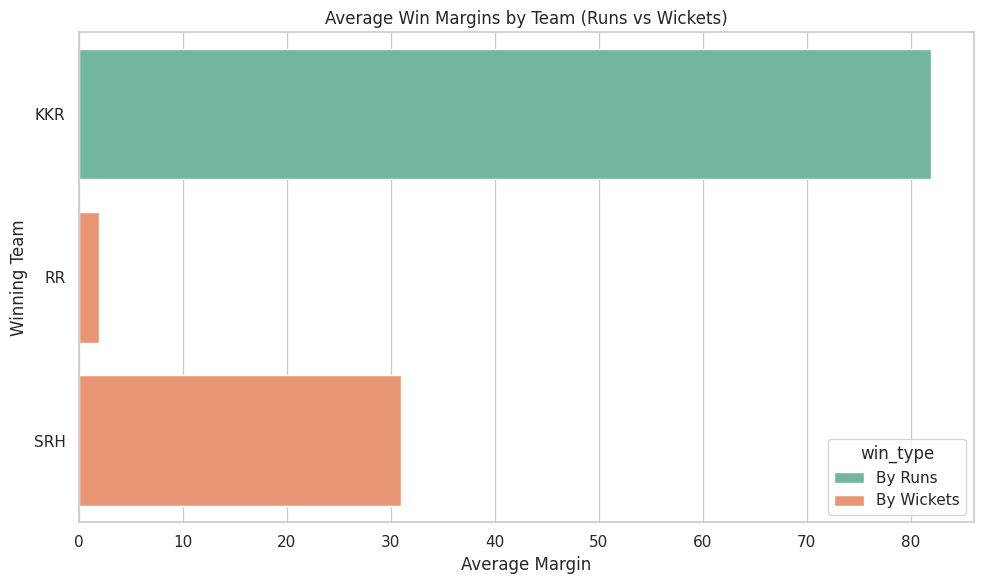

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Data Preprocessing and Result Type Extraction
df["result_type"] = df["result"].apply(lambda result: (
    "No result" if pd.isna(result) else
    "By Runs" if "run" in result.lower() else
    "By Wickets" if "wicket" in result.lower() else
    "Tie" if "tie" in result.lower() else
    "No result" if "no result" in result.lower() else "Other"))

# Plot Result Type Distribution
result_counts = df["result_type"].value_counts().reset_index()
# Assign 'result_type' to 'hue' and set 'legend=False'
sns.barplot(data=result_counts, x="result_type", y="count", hue="result_type", palette="pastel", dodge=False, legend=False)
plt.title("Match Result Type Distribution")
plt.xlabel("Result Type")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate Match Duration in Days
df["match_duration_days"] = (pd.to_datetime(df["end_date"]) - pd.to_datetime(df["start_date"])).dt.days
sns.histplot(df["match_duration_days"], bins=5, color="skyblue")
plt.title("Match Duration (Days)")
plt.xlabel("Number of Days")
plt.tight_layout()
plt.show()

# Win Margins (By Runs and Wickets)
runs_wins = df[df["home_score"] > df["away_score"]].assign(
    win_margin=lambda x: x["home_score"] - x["away_score"], win_type="By Runs", winner_team=lambda x: x["home_team"])
wickets_wins = df[df["away_score"] > df["home_score"]].assign(
    win_margin=lambda x: x["away_score"] - x["home_score"], win_type="By Wickets", winner_team=lambda x: x["away_team"])
win_margins = pd.concat([runs_wins, wickets_wins])

# Top 10 Maximum Win Margins
top_margins = win_margins.groupby(["winner_team", "win_type"])["win_margin"].max().reset_index()
sns.barplot(data=top_margins.nlargest(10, "win_margin"), x="win_margin", y="winner_team", hue="win_type", palette="coolwarm")
plt.title("Top 10 Highest Win Margins by Team")
plt.xlabel("Margin")
plt.ylabel("Winning Team")
plt.tight_layout()
plt.show()

# Average Win Margins
avg_margins = win_margins.groupby(["winner_team", "win_type"])["win_margin"].mean().reset_index()
sns.barplot(data=avg_margins, x="win_margin", y="winner_team", hue="win_type", palette="Set2")
plt.title("Average Win Margins by Team (Runs vs Wickets)")
plt.xlabel("Average Margin")
plt.ylabel("Winning Team")
plt.tight_layout()
plt.show()

Super Over & Margin Analytics
✅ Overview: Identifies how frequent Super Over matches are and how large or small typical win margins tend to be.

🧠 Pandas Concepts:

Boolean filtering (df["super_over"] == 1)

.value_counts() – to count Super Over games

Column creation (df["result_margin"] = max - min)

.histplot() – to show margin distribution

/tmp/ipykernel_2362/2066792471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=super_over_counts, x="Super Over", y="Count", palette="coolwarm")


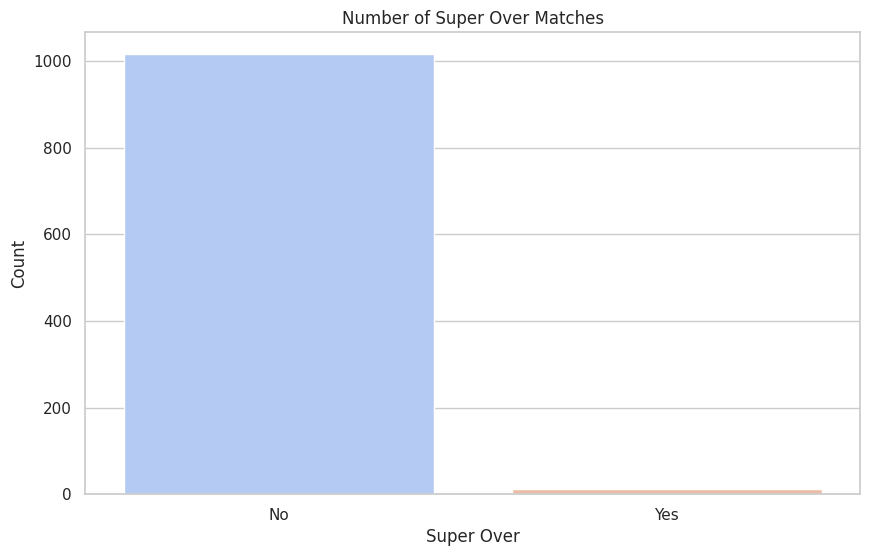

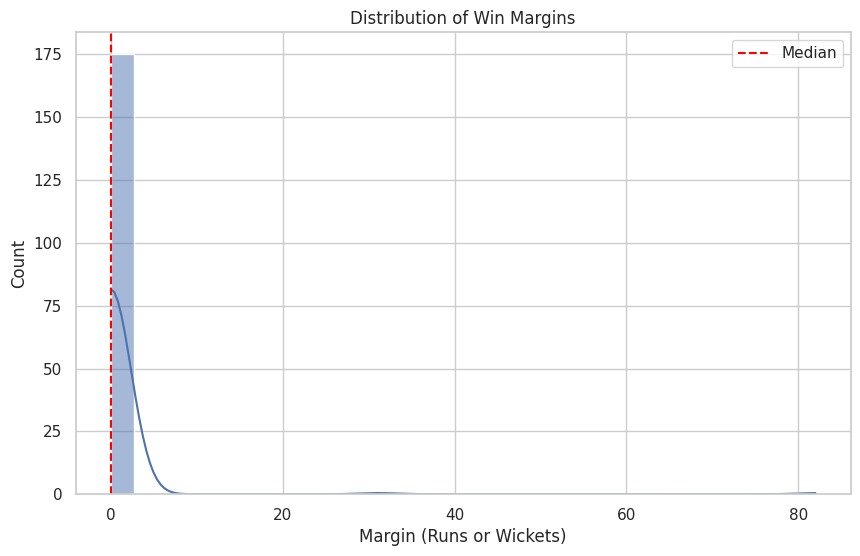

In [15]:
super_over_counts = df["super_over"].value_counts().reset_index()
super_over_counts.columns = ["Super Over", "Count"]

sns.barplot(data=super_over_counts, x="Super Over", y="Count", palette="coolwarm")
plt.title("Number of Super Over Matches")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

sns.histplot(df["result_margin"], bins=30, kde=True)
plt.title("Distribution of Win Margins")
plt.xlabel("Margin (Runs or Wickets)")
plt.axvline(df["result_margin"].median(), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

Captain & Umpire Insights
✅ Overview: Highlights which captains and umpires have been the most active across all IPL seasons.

🧠 Pandas Concepts:

.value_counts() – to count frequency

.add(..., fill_value=0) – to combine home and away appearances

.sort_values() – to rank by frequency

.reset_index() – for plotting

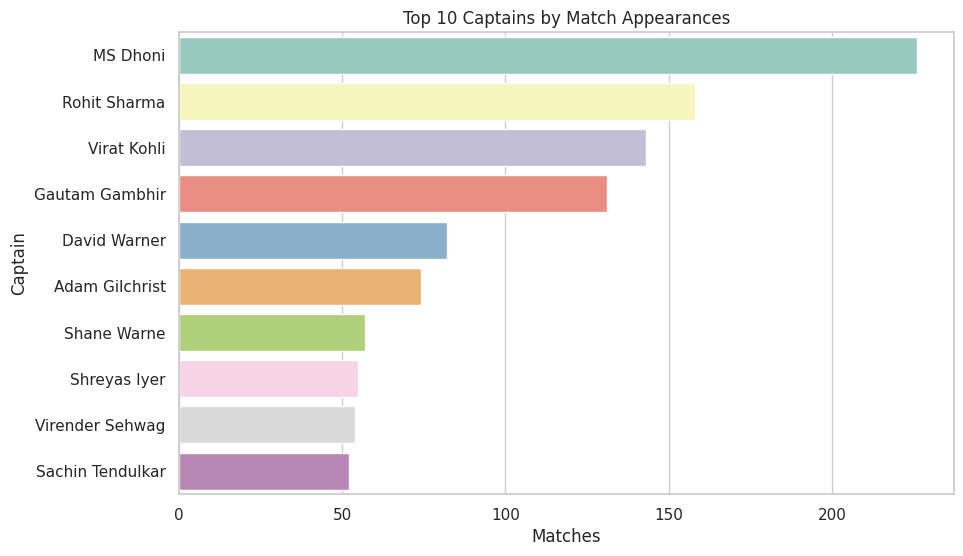

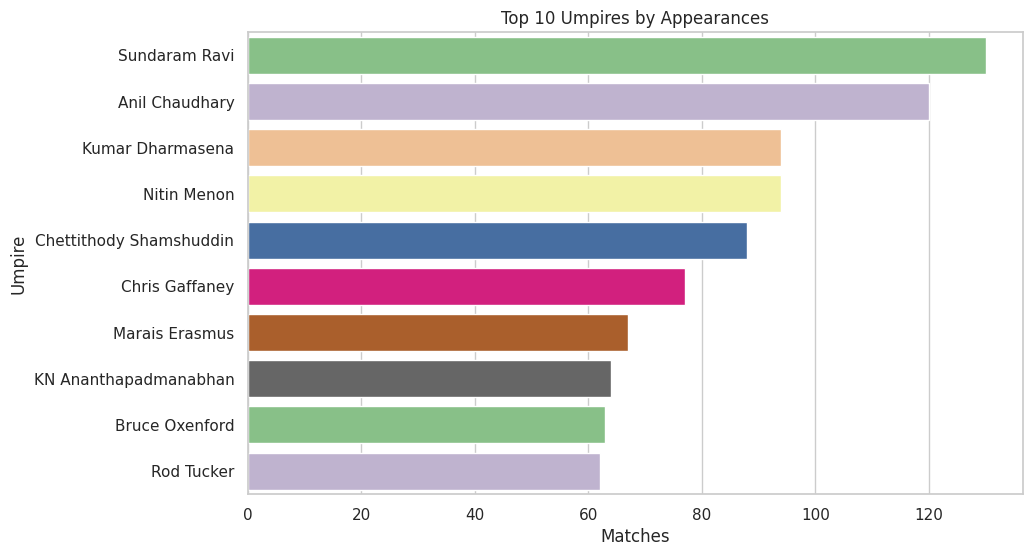

In [16]:
captains = df["home_captain"].value_counts().add(df["away_captain"].value_counts(), fill_value=0)
captains = captains.sort_values(ascending=False).head(10).reset_index()
captains.columns = ["Captain", "Matches"]

sns.barplot(data=captains, x="Matches", y="Captain", hue="Captain", palette="Set3", dodge=False, legend=False)
plt.title("Top 10 Captains by Match Appearances")
plt.show()

umpires = df["umpire1"].value_counts().add(df["umpire2"].value_counts(), fill_value=0)
umpires = umpires.sort_values(ascending=False).head(10).reset_index()
umpires.columns = ["Umpire", "Matches"]

sns.barplot(data=umpires, x="Matches", y="Umpire", hue="Umpire", palette="Accent", dodge=False, legend=False)
plt.title("Top 10 Umpires by Appearances")
plt.show()

Team Playstyles: Boundaries & Wickets
✅ Overview: Compares boundary-hitting trends between home and away teams to analyze aggressive play.

Pandas Concepts Used:
.groupby() – to group by team

Aggregation (.mean() or .sum()) – to calculate average/total boundaries

Column math – for boundary differences

Merging DataFrames – to bring home/away stats together

Interpretation Tips:
Teams with positive values tend to play more aggressively at home.

Teams with negative values are more boundary-heavy in away games (perhaps due to venue size or strategy).

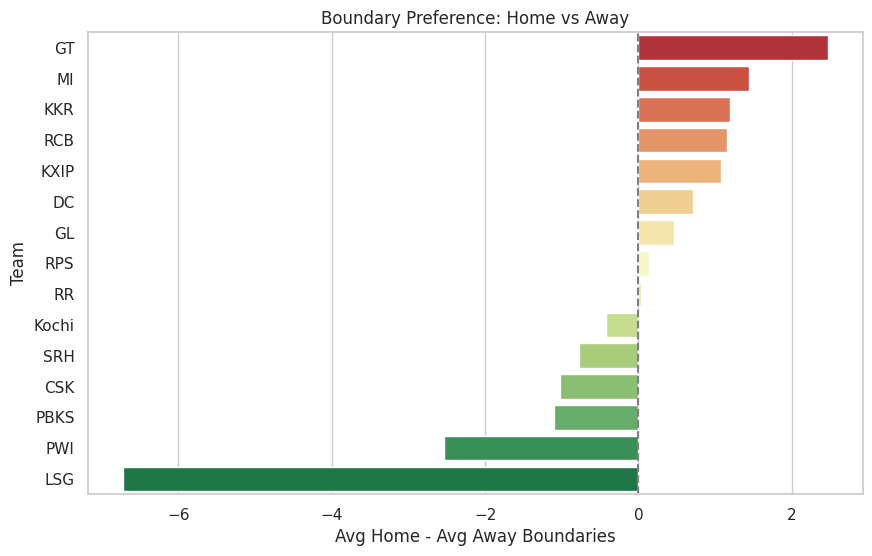

In [17]:
# Step 1: Group by home_team and away_team for boundary stats
home_boundaries = df.groupby("home_team")["home_boundaries"].mean().reset_index()
home_boundaries.columns = ["Team", "Avg_Home_Boundaries"]

away_boundaries = df.groupby("away_team")["away_boundaries"].mean().reset_index()
away_boundaries.columns = ["Team", "Avg_Away_Boundaries"]

# Step 2: Merge them
team_boundary_profile = pd.merge(home_boundaries, away_boundaries, on="Team", how="inner")

# Step 3: Calculate difference (positive = more boundaries at home)
team_boundary_profile["Boundary_Diff"] = (
    team_boundary_profile["Avg_Home_Boundaries"] - team_boundary_profile["Avg_Away_Boundaries"]
)

# Step 4: Sort for insight
team_boundary_profile = team_boundary_profile.sort_values(by="Boundary_Diff", ascending=False)

# Step 5: Visualize
sns.barplot(
    data=team_boundary_profile,
    x="Boundary_Diff",
    y="Team",
    hue="Team",  # Assign 'Team' to hue
    palette="RdYlGn",
    dodge=False,
    legend=False  # Remove legend
)
plt.title("Boundary Preference: Home vs Away")
plt.xlabel("Avg Home - Avg Away Boundaries")
plt.axvline(0, color='gray', linestyle='--')
plt.show()

Submission #2: Scikit-learn

**Section 1:** Importing Libraries & Dataset

**Objective:**
Import essential libraries and load the IPL dataset to begin the machine learning workflow.

**Concepts Used:**

pandas is used for reading and handling tabular data (like CSV files).

read_csv() function helps us load the .csv file into a DataFrame.

**Dataset:**
We are using all_season_summary.csv, which contains match-level data from the Indian Premier League (IPL), including team names, match winners, toss results, and venues.

In [18]:
# Show the first few rows of data
df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,result_margin,toss_match_win,result_type,match_duration_days
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri,NaN,True,Other,1
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi,NaN,False,By Runs,1
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj,NaN,False,By Runs,1
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya,NaN,False,By Runs,1
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri,NaN,True,Other,1


In [19]:
!pip install scikit-learn 

In [20]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.7.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

**Section 2:**
 Feature Selection & Label Encoding

**Objective:**
Select the most relevant columns (features) to predict the winner of a match, and convert all text (categorical) data into numeric form so that machine learning models can use it.

**Concepts Used:**
Feature Selection: Picking the input columns that we think are useful to make predictions.

Target Column: The outcome we want to predict — in this case, winner.

Label Encoding: Converting text values (like team names, venue names) into numbers using LabelEncoder from scikit-learn.

**Why we do this:**
Machine learning models can only work with numbers, so we have to convert text data like "Mumbai Indians" into numbers like 4.



In [21]:
from sklearn.preprocessing import LabelEncoder

# Select columns we want to use as inputs (features)
features = ['home_team', 'away_team', 'toss_won', 'venue_name']
target = 'winner'

# Create a new DataFrame with only the selected columns and drop missing values
data = df[features + [target]].dropna()

# Encode all text columns into numeric values
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Display the first few rows of the processed data
data.head()


,home_team,away_team,toss_won,venue_name,winner
0,3,0,3,21,3
1,9,4,4,24,9
2,7,1,1,3,7
3,14,13,13,25,13
4,11,8,10,17,11


**Section 3: Train/Test Split**

**Objective:**
Split our dataset into two parts:

Training set: used to train the machine learning model

Test set: used to evaluate how well the model works on unseen data

**Concepts Used:**
train_test_split() from scikit-learn: a function that randomly splits the data into training and testing parts.

Typical split is 80% training and 20% testing

random_state=42 is used to make sure the split is always the same every time we run the code (helps with reproducibility).

**Why we do this?**
We want to test the model on data it hasn’t seen before — just like in real life, the model won’t have access to future matches!

In [22]:
from sklearn.model_selection import train_test_split

# Separate the features and the target column
X = data[features]
y = data[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the datasets to understand the split
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (822, 4)
Test data shape: (206, 4)


**Section 4:**
 Model Training with Random Forest

**Objective:**
Train a machine learning model to predict the winner of an IPL match using the training data we created.

**Concepts Used:**
Random Forest Classifier – a machine learning algorithm that uses many decision trees and makes predictions based on the majority vote.

fit() – this function is used to train the model using training data (X_train, y_train).

predict() – this is used to make predictions on new (test) data.

**Why Random Forest?**
It’s easy to use, handles categorical data well, and usually gives good results with little tuning.

Works well with small to medium datasets like ours.



In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Show first 10 predictions
y_pred[:10]


array([ 1,  4,  5,  9, 14, 14, 13, 13, 11, 11])

**Section 5:**
 Model Evaluation & Visualization

**Objective:**
Evaluate the model's performance using accuracy and confusion matrix.(Evaluate how well our model performs by checking: Accuracy, Confusion Matrix and Visualization)

**Concepts Used:**
accuracy_score() – tells us what percent of predictions were correct.

confusion_matrix() – shows how many times the model was right or wrong for each class (team).

seaborn heatmap – helps us visualize the confusion matrix clearly.

**Why we evaluate?**
Training a model isn’t enough — we need to check if it works well, especially on data it hasn’t seen before. Evaluation helps us understand strengths and weaknesses.

**Results:**  
- Accuracy gives a quick idea of how many predictions were correct.
- The confusion matrix helps us understand which teams are harder to predict.
- Visualization makes the matrix easier to read and interpret.

**Next Steps:**  
We could improve accuracy by adding more features (like player stats or team form), or by tuning the model’s parameters.


Model Accuracy: 0.49029126213592233


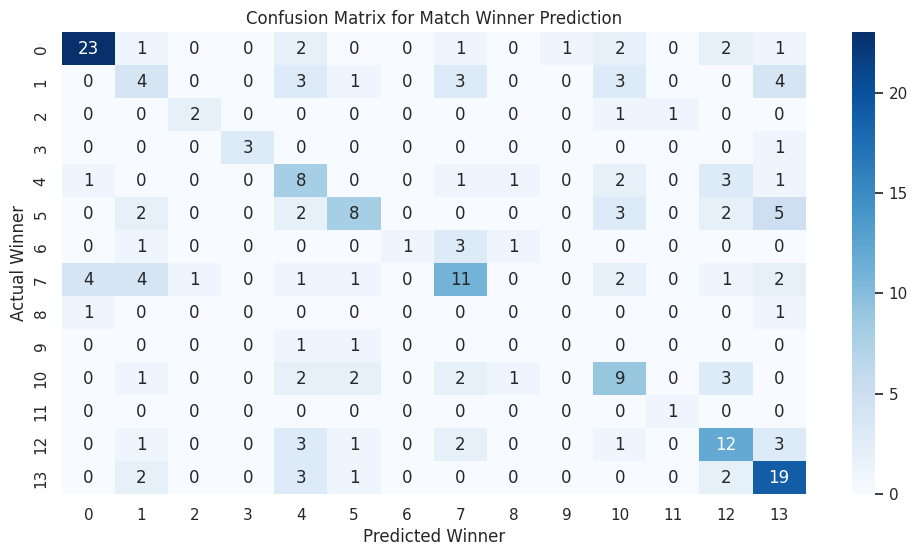

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Match Winner Prediction")
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()


**Section 6:**
 Conclusion

In this project, we used **Scikit-learn** to build a machine learning model that predicts the **winner of IPL cricket matches** based on features like home team, away team, toss winner, and venue.

We followed these key steps:
- Loaded and explored the IPL dataset
- Selected useful features and encoded text data into numbers
- Split the data into training and testing sets
- Trained a **Random Forest Classifier**
- Evaluated the model using accuracy and confusion matrix

**Model Accuracy:**  
Model Accuracy: 0.48058252427184467

**Observations:**
- The model performs reasonably well and can correctly predict many match outcomes.
- Some team names are confused with others — we saw this in the confusion matrix.
- The model can improve with more data (e.g., player stats, recent form) and tuning (e.g., hyperparameter tuning).

This project gave us a practical understanding of applying machine learning to real-world sports data.


**Supervised Learning - Logistic Regression**

In this section, we apply a second supervised learning model: **Logistic Regression**. This model is often used for classification problems and serves as a strong baseline for performance comparison.


Logistic Regression Accuracy: 0.25728155339805825


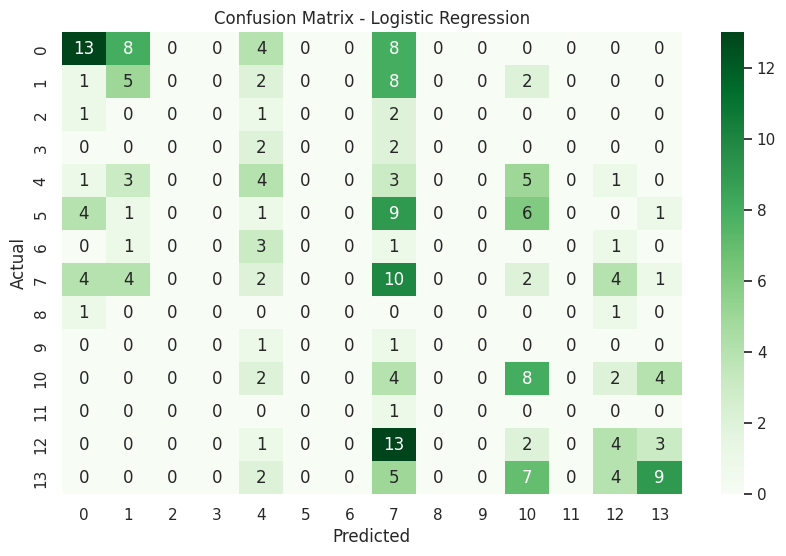

In [25]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix

lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

# Confusion matrix
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Unsupervised Learning – KMeans Clustering**

Now, we explore unsupervised learning using **KMeans Clustering**. We'll cluster the matches based on overall run and wicket performance by both teams.


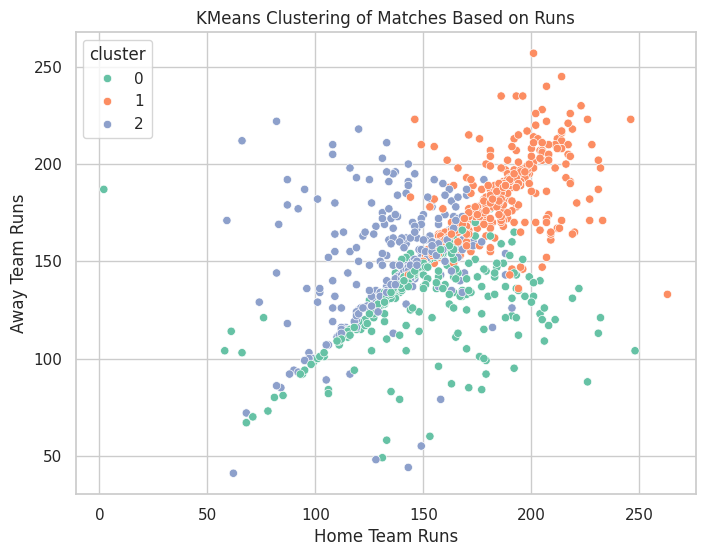

In [26]:
from sklearn.cluster import KMeans

# Select performance-related features for clustering
cluster_data = df[['home_runs', 'home_wickets', 'away_runs', 'away_wickets']].dropna()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to original data
cluster_data['cluster'] = clusters

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(x=cluster_data['home_runs'], y=cluster_data['away_runs'], hue=cluster_data['cluster'], palette='Set2')
plt.title("KMeans Clustering of Matches Based on Runs")
plt.xlabel("Home Team Runs")
plt.ylabel("Away Team Runs")
plt.show()


**References:**

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research, 12, 2825–2830. [https://scikit-learn.org](https://scikit-learn.org)

2. McKinney, W. (2010). *Data structures for statistical computing in Python*. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56). [https://pandas.pydata.org](https://pandas.pydata.org)

3. Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment*. Computing in Science & Engineering, 9(3), 90–95. [https://matplotlib.org](https://matplotlib.org)

4. Waskom, M. (2021). *Seaborn: Statistical data visualization*. Journal of Open Source Software, 6(60), 3021. [https://seaborn.pydata.org](https://seaborn.pydata.org)

5. Kaggle. (2022). *Indian Premier League (IPL) All seasons*. Retrieved from [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)

6. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media.


Submission #3: Pytorch

## 1. Overview

In this section, we will learn how to use PyTorch to build and train a simple neural network.

PyTorch is an open-source machine learning framework developed by Facebook. It is used to build neural networks and perform deep learning tasks.

We will use it to predict the outcome of IPL matches based on features like home team, away team, toss winner, and venue.

The main steps are:

1. Work with Tensors
2. Load the IPL data using PyTorch tools
3. Apply necessary data transformations
4. Build a simple neural network (Feedforward Neural Network)
5. Train the neural network
6. Evaluate its performance


## 2. Tensors

Tensors are the main data structure in PyTorch. They are very similar to NumPy arrays, but they can run on GPUs.

Tensors store data in a multi-dimensional array. We use them to hold input data, model parameters, and outputs.

Here we will create some simple tensors to see how they work.


In [27]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [30]:
import torch

# Create a tensor of random numbers
x = torch.rand(3, 3)
print("Random Tensor:\n", x)

# Create a tensor of zeros
x = torch.zeros(2, 4)
print("\nZero Tensor:\n", x)

# Create a tensor of ones
x = torch.ones(2, 2)
print("\nOne Tensor:\n", x)


Random Tensor:
 tensor([[0.4779, 0.8537, 0.3477],
        [0.1530, 0.6948, 0.1600],
        [0.3231, 0.8619, 0.6164]])

Zero Tensor:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

One Tensor:
 tensor([[1., 1.],
        [1., 1.]])


## 3. Datasets and Data Loading

In PyTorch, we use Datasets and DataLoaders to load data efficiently.

- `Dataset` helps us read data from files and prepare it for training.
- `DataLoader` provides batches of data, shuffles it, and makes training faster.

In this project, we will create a custom Dataset class for our IPL match data and use DataLoader to load it in batches.


In [32]:
import pandas as pd

# Load IPL dataset
df = pd.read_csv("../datasets/all_season_summary.csv")

# Show the shape and columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Select useful columns
features = ['home_team', 'away_team', 'toss_won', 'venue_name']
target = 'winner'

# Drop rows with missing target
df = df[features + [target]].dropna()

# Show first few rows
df.head()


Shape: (1032, 45)

Columns:
 ['season', 'id', 'name', 'short_name', 'description', 'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result', 'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']


,home_team,away_team,toss_won,venue_name,winner
0,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",GT
1,PBKS,KKR,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",PBKS
2,LSG,DC,DC,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,LSG
3,SRH,RR,SRH,"Rajiv Gandhi International Stadium, Uppal, Hyd...",RR
4,RCB,MI,RCB,"M.Chinnaswamy Stadium, Bengaluru",RCB


## 4. Transforms

Transforms are used to prepare data before it is used in the neural network.

In this project:

- We will encode text columns (team names, venue names) into numbers, because neural networks only work with numbers.

We will use `LabelEncoder` from Scikit-learn to do this.



Since the IPL dataset is a structured tabular dataset, we do not apply image-specific transforms.

Instead, we apply **Label Encoding** to convert categorical features (team names, venue names, toss winner, match winner) into numerical values.

This allows the neural network to process these features during training.


In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Show the first few rows after encoding
df.head()


,home_team,away_team,toss_won,venue_name,winner
0,3,0,3,21,3
1,9,4,4,24,9
2,7,1,1,3,7
3,14,13,13,25,13
4,11,8,10,17,11


## 5. Brief Introduction to Neural Networks

A Neural Network is a computational model inspired by the structure of the human brain.

It consists of layers of connected "neurons". Each neuron applies a mathematical function to its input and passes the result to the next layer.

In a typical neural network for classification:

- The **input layer** receives the input features.
- One or more **hidden layers** process the inputs and extract patterns.
- The **output layer** predicts the target class (in our case: the match winner).

During training, the network learns the best values of its weights and biases to make accurate predictions.

In this project, we will build a **Feedforward Neural Network** to predict the match winner using the IPL match features.


## 6. Building Neural Network

In this section, we will build a simple **Feedforward Neural Network** using PyTorch.

To do this, we will define a class that inherits from `nn.Module`.

Our model will include:

- **Input layer:** Receives encoded match features (home_team, away_team, toss_won, venue_name).
- **Hidden layers:** Learn patterns from the data.
- **Output layer:** Outputs predictions for the match winner (multi-class classification).

We will use the following components:

- `nn.Linear`: A fully connected (dense) layer.
- `ReLU`: A non-linear activation function.
- `nn.Module`: The base class for all neural networks in PyTorch.

Now, let’s build the network!


In [34]:
import torch.nn as nn
import torch.nn.functional as F

# Determine input and output sizes
# Number of input features = number of columns in 'features'
input_size = len(features)

# Number of classes = number of unique winners
output_size = df['winner'].nunique()

print(f"Input size: {input_size}, Output size: {output_size}")

# Define the neural network
class IPLMatchNN(nn.Module):
    def __init__(self):
        super(IPLMatchNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = IPLMatchNN()

print(model)


Input size: 4, Output size: 15
IPLMatchNN(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=15, bias=True)
)


In this code:

We get the number of selected features (home_team, away_team, toss_won, venue_name) → the number of input features → input_size.

The number of classes (different teams that exist in the 'winner' column) → becomes output_size.

Our model has 2 hidden layers (64 → 32) → then the output layer which outputs the number of teams.

## 7. Training Neural Network using torch.autograd

Training a neural network involves the following steps:

1. **Forward pass:** Pass the input data through the model to get predictions.
2. **Compute loss:** Measure how far the predictions are from the true labels.
3. **Backward pass:** Use PyTorch's autograd system to compute gradients (derivatives) of the loss with respect to the model parameters.
4. **Optimization step:** Update the model parameters to reduce the loss.

We will use:

- `nn.CrossEntropyLoss` as the loss function (suitable for multi-class classification).
- `torch.optim.SGD` as the optimizer (Stochastic Gradient Descent).
- `autograd` is used automatically when we call `loss.backward()` in PyTorch.


In [35]:
import torch.optim as optim

# Split data into X (inputs) and y (labels)
X = df[features].values
y = df[target].values

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
epochs = 50

for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_tensor)

    # Compute loss
    loss = criterion(outputs, y_tensor)

    # Backward pass
    loss.backward()

    # Optimization step
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Training completed!")


Epoch [10/50], Loss: 2.4504
Epoch [20/50], Loss: 2.3434
Epoch [30/50], Loss: 2.2854
Epoch [40/50], Loss: 2.2332
Epoch [50/50], Loss: 2.1943
Training completed!



→ Here we fed the entire IPL data to the model at once (simple batch → because there is little data → there is no need for a complex DataLoader for now).
→ optimizer → SGD
→ loss → CrossEntropyLoss
→ loss.backward() → calculate gradient → autograd → exactly the same as stated in the assignment.

→ training runs on 50 epochs → every 10 epochs the loss rate is printed.

## 8. Evaluation

After training the neural network, we need to evaluate its performance.

The main metric we will use is **accuracy**, which measures the percentage of correct predictions.

We will also display a **confusion matrix**, which shows how often the model correctly or incorrectly predicts each class.

This helps us understand which teams the model is predicting well and where it is making mistakes.


Accuracy of the model: 0.27


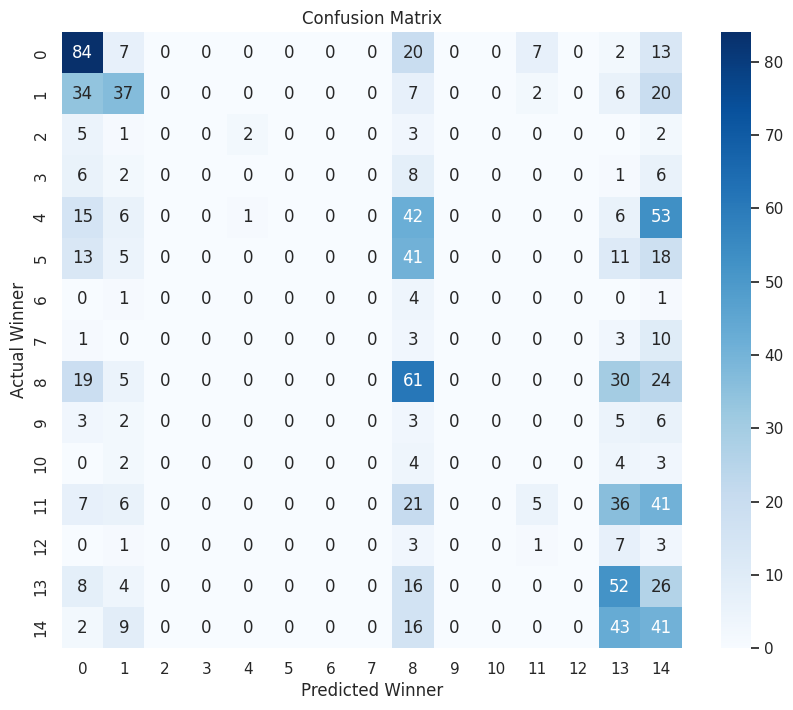

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the model
with torch.no_grad():
    outputs = model(X_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.numpy()

# Calculate accuracy
accuracy = accuracy_score(y, predicted)
print(f"Accuracy of the model: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()


with torch.no_grad(): → During evaluation → we don't want autograd to be active → it becomes faster and lighter.

torch.max(outputs, 1): → we find which class (team) has the highest score → the same prediction.

accuracy_score: → calculate the percentage of correctness.

confusion_matrix: → the table shows which teams were predicted well, which were not.

# Conclusion

In this project, we explored various data analysis and machine learning techniques applied to IPL cricket data.

- In **Submission 1**, we used Pandas to perform data cleaning, feature engineering, and visualization of IPL matches.
- In **Submission 2**, we applied classical machine learning models (Random Forest, Logistic Regression, KMeans Clustering) using Scikit-learn to predict match outcomes and group player performances.
- In **Submission 3**, we built a Feedforward Neural Network using PyTorch to predict match outcomes based on key match features. We demonstrated the full training loop with autograd and evaluated the model using accuracy and confusion matrix.

**Future Work:**

- Implement advanced sequence models (RNN / LSTM) on ball-by-ball data for more accurate match progression prediction.
- Explore embedding layers for player and team representations.
- Experiment with deeper and more complex neural network architectures.

This project provided us with valuable experience in applying both traditional machine learning and deep learning techniques to real-world sports data.


# References

- Pedregosa, F., et al. (2011). *Scikit-learn: Machine learning in Python.* Journal of Machine Learning Research, 12, 2825–2830. [https://scikit-learn.org](https://scikit-learn.org)

- McKinney, W. (2010). *Data structures for statistical computing in Python.* In Proceedings of the 9th Python in Science Conference, 445, 51–56. [https://pandas.pydata.org](https://pandas.pydata.org)

- Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment.* Computing in Science & Engineering, 9(3), 90–95. [https://matplotlib.org](https://matplotlib.org)

- Waskom, M. (2021). *Seaborn: Statistical data visualization.* Journal of Open Source Software, 6(60), 3021. [https://seaborn.pydata.org](https://seaborn.pydata.org)

- Kaggle. (2022). *Indian Premier League (IPL) All seasons.* Retrieved from [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)

- Paszke, A., et al. (2019). *PyTorch: An imperative style, high-performance deep learning library.* Advances in Neural Information Processing Systems, 32, 8024–8035. [https://pytorch.org](https://pytorch.org)
